<a href="https://colab.research.google.com/github/JustynaGoc/machine-learning-bootcamp/blob/main/Metryki_klasyfikacja_binarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sklearn.__version__

'1.6.1'

In [2]:
##Accuracy - dokładność klasyfiakcji


In [3]:
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8

In [5]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results.head()

,y_true,y_pred
0,1,0
1,0,0
2,1,1
3,1,1
4,0,0


In [6]:
results = results.sort_values(by = 'y_true')
results = results.reset_index(drop = True)
results["sample"]= results.index +1
results

,y_true,y_pred,sample
0,0,0,1
1,0,0,2
2,0,0,3
3,0,1,4
4,0,0,5
5,0,0,6
6,0,1,7
7,0,0,8
8,0,0,9
9,0,0,10


In [7]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x = results["sample"], y = results["y_true"], mode = 'markers', name="y_true"), row = 1, col = 1)
fig.add_trace(go.Scatter(x = results["sample"], y = results["y_pred"], mode = 'markers', name="y_pred"), row = 2, col = 1)
fig.update_layout(width = 1000, height = 700, title = 'Klasyfikator binarny')
fig.show()

In [8]:
#Macierz konfuzji /pomylek

In [9]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_true, y_pred)



In [10]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

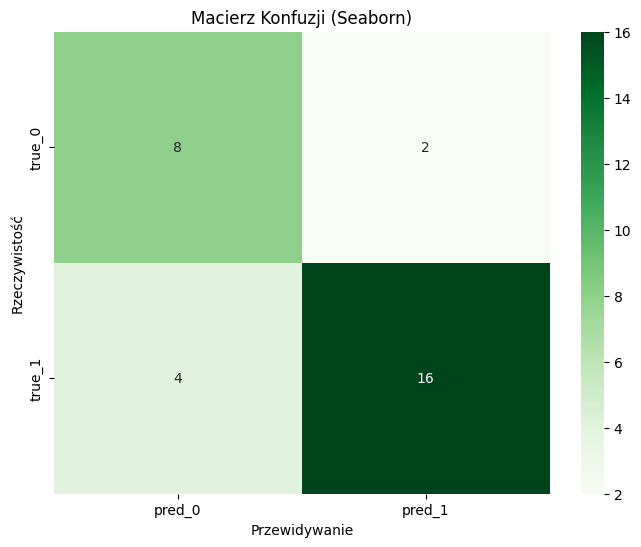

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['pred_0', 'pred_1'],
            yticklabels=['true_0', 'true_1'])

plt.ylabel('Rzeczywistość')
plt.xlabel('Przewidywanie')
plt.title('Macierz Konfuzji (Seaborn)')
plt.show()

In [12]:
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])
cm_df

,pred_0,pred_1
true_1,8,2
true_0,4,16


In [13]:
tn, fp, fn, tp = cm.ravel() # spłaszcza macierz
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')

True Negatives: 8
False Positives: 2
False Negatives: 4
True Positives: 16


In [14]:
#False Positive rate - type I error
fpr = fp / (fp + tn)
fpr


np.float64(0.2)

In [15]:
#False negative rate - type II error
fnr = fn / (fn + tp)
fnr

np.float64(0.2)

In [16]:
#Precision - ile obserwacji przewidywanych jako pozytycne sa w rzeczywistosci pozytywne
precision = tp / (tp + fp)
precision

np.float64(0.8888888888888888)

In [17]:
#Recall - jak wiele obserwacji z wszystkicj  pozytywmych sklasyfikowalismy jako pozytywne
recall = tp / (tp + fn)
recall

np.float64(0.8)

In [18]:
#raport klasyfikacji


from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.89      0.80      0.84        20

    accuracy                           0.80        30
   macro avg       0.78      0.80      0.78        30
weighted avg       0.81      0.80      0.80        30



In [19]:
# krzywa ROC

from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_true, y_pred, pos_label=1)
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
roc.head()



,fpr,tpr
0,0.0,0.0
1,0.2,0.8
2,1.0,1.0


In [21]:
def plot_roc_curve(y_true, y_pred):
    # Binary classification
    from sklearn.metrics import roc_curve
    fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)

    fig = go.Figure(
        data=[
            go.Scatter(x=roc['fpr'], y=roc['tpr'],
                    line_color='red',
                    name='ROC Curve'),
            go.Scatter(x=[0, 1], y=[0, 1],
                    mode='lines',
                    line_dash='dash',
                    line_color='navy')
        ],
        layout=go.Layout(xaxis_title='False Positive Rate',
                         yaxis_title='True Positive Rate',
                         title='ROC Curve',
                         showlegend=False,
                         width=700))
    fig.show()

plot_roc_curve(y_true, y_pred)

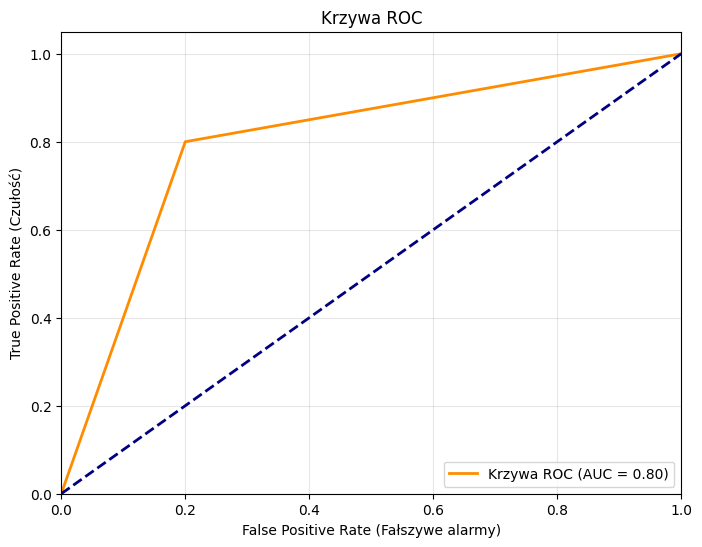

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Obliczamy prawdopodobieństwa dla klasy pozytywnej (1)
# classifier to Twój wytrenowany model, X_test to dane testowe


# 2. Obliczamy punkty krzywej ROC (fpr - fałszywe alarmy, tpr - czułość)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# 3. Obliczamy pole pod krzywą (AUC)
roc_auc = auc(fpr, tpr)

# 4. Rysujemy wykres
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Krzywa ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Linia losowego wyboru

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Fałszywe alarmy)')
plt.ylabel('True Positive Rate (Czułość)')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()